In [1]:
import lvmnebular
import numpy as np

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-10



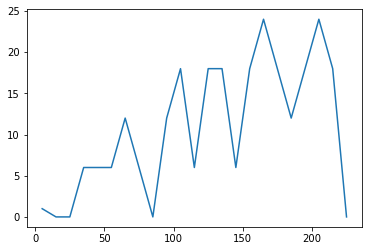

In [2]:
u=lvmnebular.simulation()
u.loadsim('Bubble_v2_1e-10',900)

u.bin(rbinmax=240, drbin=10)

In [3]:
u.fitlines(sys_vel=20, lines0= np.array([9069, 7319, 7330, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), loadfile=False)

Fitting Emmission Lines: ['9069' '7319' '7330' '6731' '6716' '6584' '6563' '6548' '6312' '5755'
 '5007' '4959' '4861' '4363' '4069' '4076' '3970' '3729' '3726']
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7330.489004963561
Fitting Line: 6731.449043984956
Fitting Line: 6716.44804329267
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Line: 6548.436835539072
Fitting Line: 6312.421091313779
Fitting Line: 5755.383932273573
Fitting Line: 5007.334031084932
Fitting Line: 4959.330828869618
Fitting Line: 4861.324291013352
Fitting Line: 4363.29106802947
Fitting Line: 4069.2714544606724
Fitting Line: 4076.271921450406
Fitting Line: 3970.264849891588
Fitting Line: 3729.248772102199
Fitting Line: 3726.248571963742
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7330.489004963561
Fitting Line: 6731.449043984956
Fitting Line: 6716.44804329267
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Lin

In [4]:
u.runpyneb(niter=4, bin=False, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:276: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


[ 8447.24661529  8407.32745067  8414.88485053  8406.67065975
  8437.55759037  8426.81114743  8451.78475572  8454.42662446
  8430.43310515  8432.65588057  8438.75231604  8408.88839796
  8442.33852392  8408.88774976  8418.74875325  8415.95352828
  8415.95352828  8414.88485053  8411.35255506  8595.80181741
  8521.2417267   8502.20465427  8530.06907958  8536.90210969
  8465.99443858  8524.32140113  8447.08158879  8576.09563196
  8458.96923797  8494.31997573  8427.88103661  8470.95702336
  8422.03900672  8488.01773518  8442.33852392  8432.90285524
  8450.71243958  8880.13093528  8745.34668647  8679.82659865
  8686.10110273  8761.76223195  8760.30738024  8622.37122613
  8719.37744466  8557.1044384   8741.59030962  8561.53383992
  8837.649247    8612.6082176   8690.76892584  8525.23709603
  8619.9297901   8491.49930126  8617.48972187  8507.31323424
  8674.91055052  8561.28306538  8512.75728094  8516.66553772
  8578.52534831  8833.59336541  8954.76982911  8940.70066977
  8926.82773044  8945.76

/home/amrita/LVM/lvmnebular/lvmnebular.py:287: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:297: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:310: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
